**# Praktikum 6 | Pengolahan Citra**

**Histogram**

TUGAS Berikan komentar pada kode program terkait dari flow kodingan yang kalian pahami

**Import Library**

In [1]:
import numpy as np                       # Mengimpor library numpy sebagai np
import imageio                           # Mengimpor library imageio
import matplotlib.pyplot as plt          # Mengimpor library matplotlib sebagai plt

**Membaca Gambar**

In [ ]:
img = imageio.imread("evul.jpeg")      #Membaca gambar dan menyimpannya ke variabel img menggunakan modul imageio

In [3]:
img_height = img.shape[0] #Mendapatkan tinggi gambar (jumlah piksel dalam dimensi vertikal) dan menyimpannya ke variabel img_height
img_width = img.shape[1] #Mendapatkan lebar gambar (jumlah piksel dalam dimensi horizontal) dan menyimpannya ke variabel img_width
img_channel = img.shape[2] #Mendapatkan jumlah saluran warna pada gambar dan menyimpannya ke variabel img_channel

**Merubah gambar menjadi Grayscale**

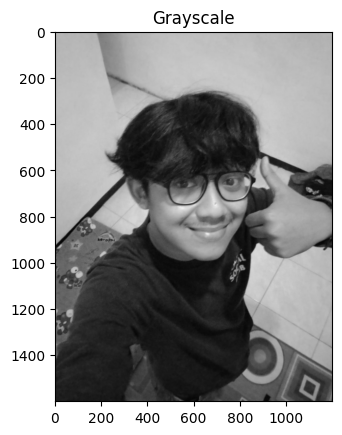

In [4]:
img_grayscale = np.zeros(img.shape, dtype=np.uint8)     # Membuat array numpy berukuran sama dengan citra menggunakan nol sebagai elemen, dengan tipe data unsigned integer 8-bit

for y in range(0, img_height):                          # Melakukan loop untuk setiap baris citra
    for x in range(0, img_width):                       # Melakukan loop untuk setiap kolom citra
        red = img[y][x][0]                              # Mengambil nilai kanal merah pada piksel
        green = img[y][x][1]                            # Mengambil nilai kanal hijau pada piksel
        blue = img[y][x][2]                             # Mengambil nilai kanal biru pada piksel
        gray = (int(red) + int(green) + int(blue)) / 3  # Menghitung nilai skala keabuan dengan menjumlahkan tiga kanal warna dan membaginya dengan tiga
        img_grayscale[y][x] = (gray, gray, gray)        # Menetapkan nilai piksel baru untuk setiap kanal dengan nilai skala keabuan yang sama

plt.imshow(img_grayscale)                               # Menampilkan citra grayscale menggunakan matplotlib
plt.title("Grayscale")                                  # Menetapkan judul plot menjadi "Grayscale"
plt.show()                                              # Menampilkan citra grayscale di jendela plot


**# Menampilkan Histogram Gambar Grayscale**

**Membuat variabel untuk menyimpan data gambar**

In [5]:
hg = np.zeros((256))        # membuat array numpy bernama `hg` dengan ukuran (256,) dan setiap elemennya diinisialisasi dengan nilai 0


**Mengisi setiap nilai dalam array hg dengan 0**

In [6]:
for x in range(0, 256):     # melakukan loop untuk setiap elemen pada array hg
    hg[x] = 0               # mengatur setiap elemen dari array hg menjadi 0

**Menghitung nilai dari gambar**

In [7]:
for y in range(0, img_height):  # melakukan loop untuk setiap baris pada citra
    for x in range(0, img_width):   # melakukan loop untuk setiap kolom pada citra
        gray = img_grayscale[y][x][0]    # mengambil nilai skala keabuan dari piksel pada citra
        hg[gray] += 1               # menambahkan 1 ke elemen array yang sesuai dengan nilai skala keabuan piksel yang ditemukan

**Menampilkan Histogram**

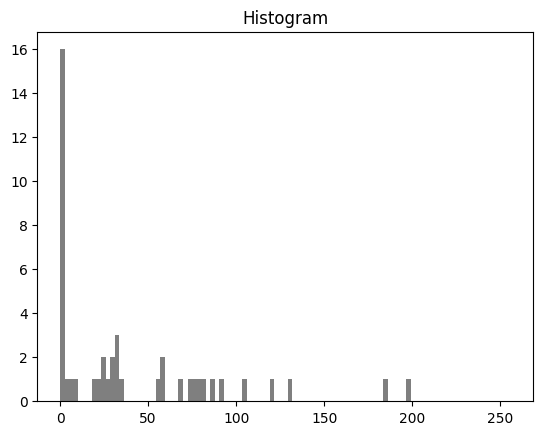

In [8]:
# plt.figure(figsize=(20, 6))
# plt.plot(hg, color="black", linewidth=2.0)
# plt.show()

bins = np.linspace(0, 256, 100)    # membuat array numpy bernama `bins` yang berisi 100 angka yang secara merata tersebar dari 0 hingga 256
plt.hist(hg, bins, color="black", alpha=0.5)   # menggambar histogram dengan menggunakan nilai dari array `hg` dan `bins`, dan menggunakan warna hitam dengan kekentalan 50%
plt.title("Histogram")          # menambahkan judul pada plot
plt.show()                      # menampilkan plot


**# Menampilkan Histogram Gambar RGB**

**Membuat variabel untuk menyimpan data gambar**

In [9]:
hgr = np.zeros((256))   # membuat array numpy `hgr` dengan ukuran (256,) dan setiap elemennya diinisialisasi dengan nilai 0
hgg = np.zeros((256))   # membuat array numpy `hgg` dengan ukuran (256,) dan setiap elemennya diinisialisasi dengan nilai 0
hgb = np.zeros((256))   # membuat array numpy `hgb` dengan ukuran (256,) dan setiap elemennya diinisialisasi dengan nilai 0
hgrgb = np.zeros((768)) # membuat array numpy `hgrgb` dengan ukuran (768,) dan setiap elemennya diinisialisasi dengan nilai 0

**Mengisi setiap nilai dalam array hg dengan 0**

In [10]:
for x in range(0, 256):
    hgr[x] = 0   # setiap elemen pada array `hgr` diisi dengan nilai 0
    hgg[x] = 0   # setiap elemen pada array `hgg` diisi dengan nilai 0
    hgb[x] = 0   # setiap elemen pada array `hgb` diisi dengan nilai 0
    
for x in range(0, 768):
    hgrgb[x] = 0  # setiap elemen pada array `hgrgb` diisi dengan nilai 0

**Menghitung nilai dari gambar**

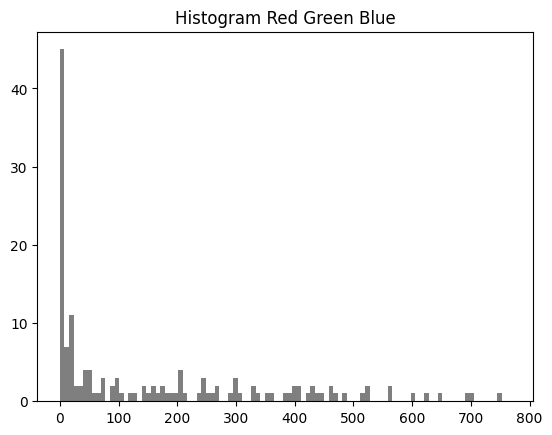

In [11]:
for x in range(0, 256):
    hgr[x] = 0   # setiap elemen pada array `hgr` diisi dengan nilai 0
    hgg[x] = 0   # setiap elemen pada array `hgg` diisi dengan nilai 0
    hgb[x] = 0   # setiap elemen pada array `hgb` diisi dengan nilai 0
    
for x in range(0, 768):
    hgrgb[x] = 0  # setiap elemen pada array `hgrgb` diisi dengan nilai 0

temp = [0]   # array `temp` diinisialisasi dengan nilai 0
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = int(img[y][x][0])   # komponen merah dari piksel yang dipilih
        green = int(img[y][x][1])   # komponen hijau dari piksel yang dipilih
        blue = int(img[y][x][2])   # komponen biru dari piksel yang dipilih
        green = green + 256   # penyesuaian indeks untuk array `hgrgb`
        blue = blue + 512   # penyesuaian indeks untuk array `hgrgb`
        hgrgb[red] += 1   # update histogram untuk komponen merah
        hgrgb[green] += 1   # update histogram untuk komponen hijau
        hgrgb[blue] += 1   # update histogram untuk komponen biru

binsrgb = np.linspace(0, 768, 100)   # buat array berisi 100 bin untuk plot histogram
plt.hist(hgrgb, binsrgb, color="black", alpha=0.5)   # plot histogram untuk array `hgrgb`
plt.title("Histogram Red Green Blue")   # judul plot histogram
plt.show()   # tampilkan plot histogram


**Menampilkan Histogram**

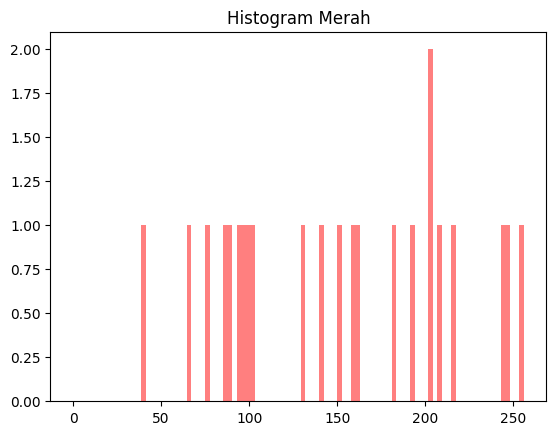

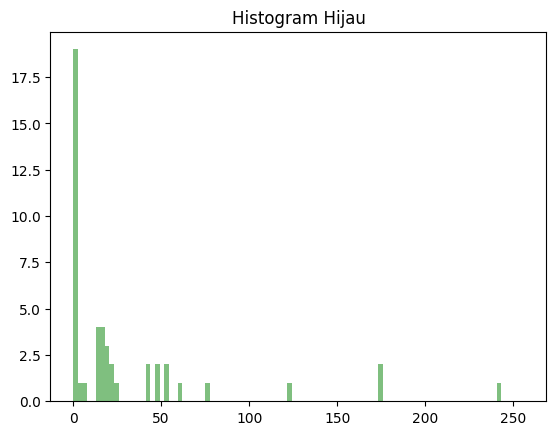

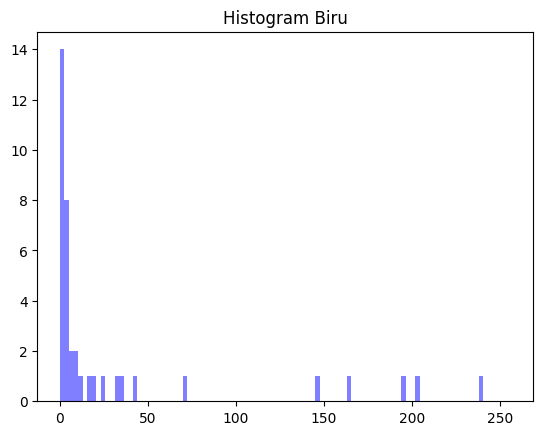

In [12]:
# Melakukan iterasi terhadap setiap piksel pada suatu gambar dan mengekstrak nilai warna
for y in range(0, img_height):
    for x in range(0, img_width):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        
        # Menambahkan nilai hitung setiap nilai warna pada histogram yang sesuai
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1

# Membuat array bins yang berisi 100 nilai terbagi secara merata antara 0 dan 256 untuk mengelompokkan nilai warna dalam histogram
bins = np.linspace(0, 256, 100)

# Menampilkan histogram untuk saluran warna merah
plt.hist(hgr, bins, color="red", alpha=0.5)
plt.title("Histogram Merah")
plt.show()

# Menampilkan histogram untuk saluran warna hijau
plt.hist(hgg, bins, color="green", alpha=0.5)
plt.title("Histogram Hijau")
plt.show()

# Menampilkan histogram untuk saluran warna biru
plt.hist(hgb, bins, color="blue", alpha=0.5)
plt.title("Histogram Biru")
plt.show()


**Menampilkan Histogram Kumulatif**

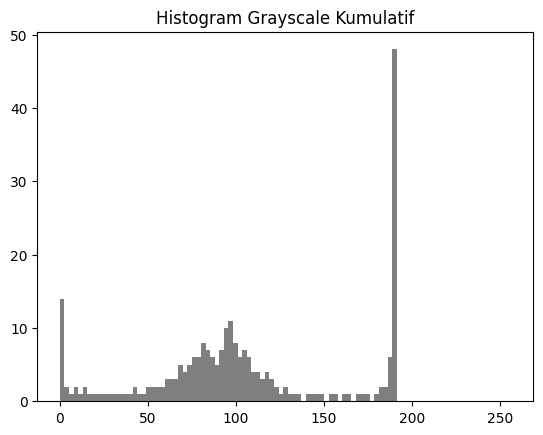

In [13]:
# Membuat array numpy kosong dengan ukuran 256 untuk histogram kumulatif dan nilai akumulasi
hgk = np.zeros((256))
c = np.zeros((256))

# Menginisialisasi semua nilai pada array hgk dan c dengan nilai 0
for x in range(0, 256):
    hgk[x] = 0
    c[x] = 0

# Melakukan iterasi pada setiap piksel pada gambar grayscale dan menambahkan nilai hitung pada histogram kumulatif
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgk[gray] += 1
                
# Menghitung nilai akumulasi pada setiap nilai pixel
c[0] = hgk[0]
for x in range(1, 256):
     c[x] = c[x-1] + hgk[x]

# Mencari nilai maksimum pada histogram kumulatif
hmaxk = c[255]

# Melakukan normalisasi pada setiap nilai akumulasi dengan faktor skala 190/hmaxk
for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

# Menampilkan histogram kumulatif grayscale
plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Kumulatif")
plt.show()


**Menampilkan Histogram Hequalisasi**

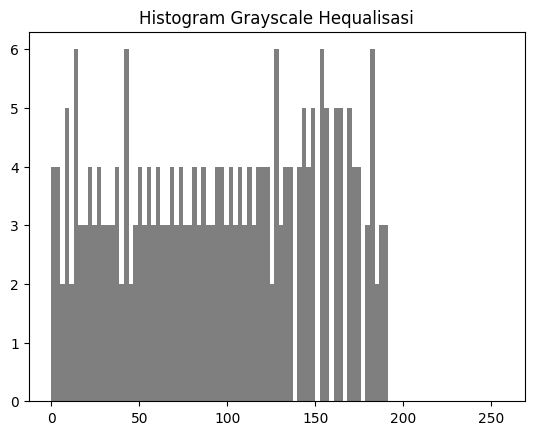

In [14]:
hgh = np.zeros((256))
h = np.zeros((256))
c = np.zeros((256))

# inisialisasi array hgh, h, dan c dengan nol, masing-masing berukuran 256
for x in range(0, 256):
    hgh[x] = 0
    h[x] = 0
    c[x] = 0
    
# menghitung histogram grayscale
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        hgh[gray] += 1
                
# menghitung histogram kumulatif
h[0] = hgh[0]
for x in range(1, 256):
    h[x] = h[x-1] + hgh[x]

# normalisasi histogram
for x in range(0, 256):
    h[x] = h[x] / img_height / img_width

# proses hequalisasi
for x in range(0, 256):
    hgh[x] = 0
    
for y in range(0, img_height):
    for x in range(0, img_width):
        gray = img_grayscale[y][x][0]
        gray = h[gray] * 255
        hgh[int(gray)] += 1

# menghitung histogram kumulatif setelah proses hequalisasi
c[0] = hgh[0]
for x in range(1, 256):
    c[x] = c[x-1] + hgh[x]

# normalisasi dan scaling
hmaxk = c[255]
for x in range(0, 256):
    c[x] = 190 * c[x] / hmaxk

# plot histogram hasil hequalisasi
plt.hist(c, bins, color="black", alpha=0.5)
plt.title("Histogram Grayscale Hequalisasi")
plt.show()
